In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import os
print(os.listdir("../input"))


Using TensorFlow backend.


['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

## 出来るだけ元の分布から崩したくないので現状のプロット

Text(0.5,1,'origin data hist')

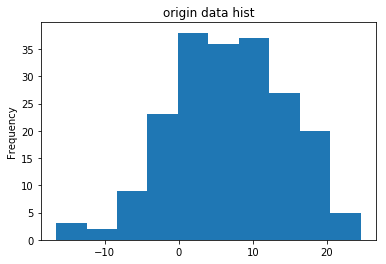

In [4]:
train[train.columns[2:]].mean().plot('hist')
plt.title('origin data hist')

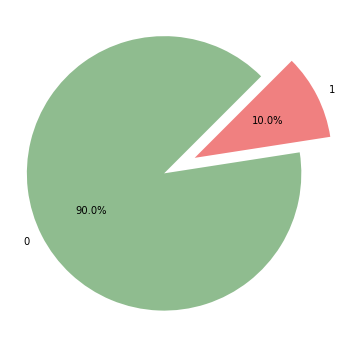

In [5]:
colors = ['darkseagreen','lightcoral']
plt.figure(figsize=(6,6))
plt.pie(train["target"].value_counts(), explode=(0, 0.25), labels= ["0", "1"], 
        startangle=45, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()

In [6]:
positive_count_train = train['target'].sum()

In [7]:
print('positive count: {}'.format(positive_count_train))

positive count: 20098


In [8]:
rus = RandomUnderSampler(ratio={0:positive_count_train*4, 1:positive_count_train}, random_state=0)
X_train_resampled, y_train_resampled = rus.fit_sample(train[train.columns[2:]], train['target'])

In [9]:
X_train_resampled = pd.DataFrame(X_train_resampled)
y_train_resampled = pd.DataFrame(y_train_resampled)

In [10]:
y_train_resampled[0].value_counts()

0    80392
1    20098
Name: 0, dtype: int64

Text(0.5,1,'origin data hist')

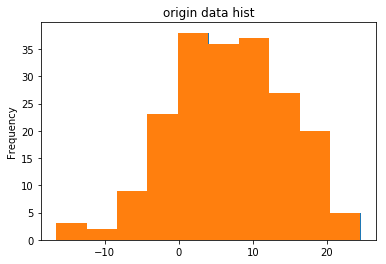

In [11]:
X_train_resampled[X_train_resampled.columns[2:]].mean().plot('hist')
train[train.columns[2:]].mean().plot('hist')
plt.title('origin data hist')
# X_train_resampled

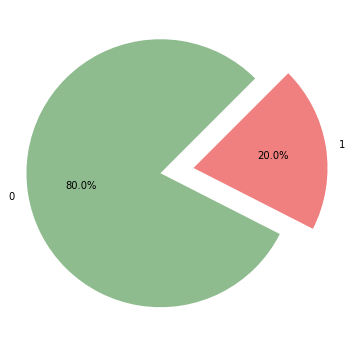

In [12]:
colors = ['darkseagreen','lightcoral']
plt.figure(figsize=(6,6))
plt.pie(y_train_resampled[0].value_counts(), explode=(0, 0.25), labels= ["0", "1"],
        startangle=45, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()